# Exemplos de análises de dados


---



### Dados de 1.USA.gov do Bitly

Em 2011, o serviço de abreviatura de URL Bitly ( https://bitly.com/ ) fez
uma parceria com o site do governo norte-americano USA.gov
( https://www.usa.gov/ ) para oferecer um feed de dados anônimos
coletados dos usuários que abreviam links terminados com .gov ou
.mil . Em 2011, um feed ativo, assim como imagens instantâneas
(snapshots) de hora em hora estavam disponíveis na forma de
arquivos-texto que podiam ser baixados. Atualmente (em 2017,
quando escrevi o livro), esse serviço está desativado, mas
preservamos um dos arquivos de dados para os exemplos da obra.

No caso das imagens instantâneas de hora em hora, cada linha nos
arquivos contém um formato comum de dados web conhecido como
JSON (JavaScript Object Notation, ou Notação de ObjetosJavaScript). Por exemplo, se lermos somente a primeira linha de um
arquivo, poderemos ver algo como:


In [1]:
#!wget -P "/content/drive/MyDrive/Análise de Dados/DataSets" https://github.com/wesm/pydata-book/archive/refs/heads/2nd-edition.zip

In [2]:
#!unzip "/content/drive/MyDrive/Análise de Dados/DataSets/2nd-edition.zip" -d "/content/drive/MyDrive/Análise de Dados/DataSets"

In [3]:
path = '/content/drive/MyDrive/Análise de Dados/DataSets/bitly_usagov/example.txt'

In [4]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

Python tem bibliotecas tanto embutidas quanto de terceiros para
converter uma string JSON em um objeto de dicionário Python.
Nesse caso, usaremos o módulo *json* e sua função *loads* chamada a
cada linha do arquivo de exemplo que baixamos:

In [5]:
import json

In [6]:
records = [json.loads(line) for line in open(path)]

O objeto resultante *records* agora é uma lista de dicionários Python:

In [7]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### Contando fusos horários em Python puro

Suponha que estivéssemos interessados em descobrir os fusos
horários que ocorrem com mais frequência no conjunto de dados (o
campo *tz*). Há muitas maneiras pelas quais poderíamos fazer isso.
Em primeiro lugar, vamos extrair uma lista de fusos horários,
novamente, usando uma list comprehension (abrangência de lista):

In [8]:
# time_zones = [rec['tz'] for rec in records]

Opa! O fato é que nem todos os registros têm um campo de fuso
horário. É fácil cuidar disso, pois podemos acrescentar a verificação
*if 'tz' in rec* no final da list comprehension:

In [9]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [10]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Basta observar os primeiros dez fusos horários e veremos que
alguns deles são desconhecidos (string vazia). Podemos filtrá-los
também, mas vamos deixá-los aí por enquanto. Para gerarcontadores por fuso horário, apresentarei duas abordagens: o modo
mais difícil (usando somente a biblioteca-padrão de Python) e o
modo mais fácil (usando o pandas). Uma forma de fazer a contagem
é usar um dicionário para armazenar os contadores enquanto
iteramos pelos fusos horários:

In [11]:
def get_counts(seq):
  counts = {}
  for x in seq:
    if x in counts:
      counts[x] += 1
    else:
      counts[x] = 1
  return counts

Usando ferramentas mais sofisticadas da biblioteca-padrão de
Python, podemos escrever o mesmo código de modo mais conciso:

In [12]:
from collections import defaultdict

In [13]:
def get_counts2(seq):
  counts = defaultdict(int)
  for x in seq:
    counts[x] += 1
  return counts

Coloquei essa lógica em uma função apenas para deixá-la mais
reutilizável. Para usá-la nos fusos horários, basta passar a lista
*time_zones*:

In [14]:
counts = get_counts(time_zones)

In [15]:
counts['America/Recife']

2

In [16]:
len(time_zones)

3440

Se quisermos os 10 primeiros fusos horários e seus contadores,
poderemos fazer um pouco de acrobacias com o dicionário:

In [17]:
def top_counts(count_d, n=10):
  values_key_pairs = [(count, tz) for tz, count in count_d.items()]
  values_key_pairs.sort()
  return values_key_pairs[-n:]

In [18]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

Se fizer pesquisas na biblioteca-padrão de Python, encontrará a
classe *collections.Counter*, que facilitará bastante essa tarefa:

In [19]:
from collections import Counter

In [20]:
counts = Counter(time_zones)

In [21]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Contando fusos horários com o pandas

Criar um DataFrame a partir do conjunto original de registros é fácil
e basta passar a lista deles para *pandas.DataFrame*:

In [22]:
import pandas as pd

In [23]:
frame = pd.DataFrame(records)

In [24]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [25]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

A saída mostrada para frame é a *visão resumida* (summary view),
exibida para objetos DataFrame grandes. Podemos então utilizar o
método *value_counts* de Series:

In [26]:
tz_counts = frame['tz'].value_counts()

In [27]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

Esses dados podem ser visualizados com a matplotlib. Podemos
fazer algumas manipulações para preencher dados de fusos
horários desconhecidos e ausentes com um valor substituto nos
registros. Substituiremos os valores ausentes com o método *fillna* e
usaremos uma indexação booleana de array para as strings vazias:

In [28]:
clean_tz = frame['tz'].fillna('Missing')

In [29]:
clean_tz[clean_tz == ''] = 'Unknown'

In [30]:
tz_counts = clean_tz.value_counts()

In [31]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
subset = tz_counts[:10]

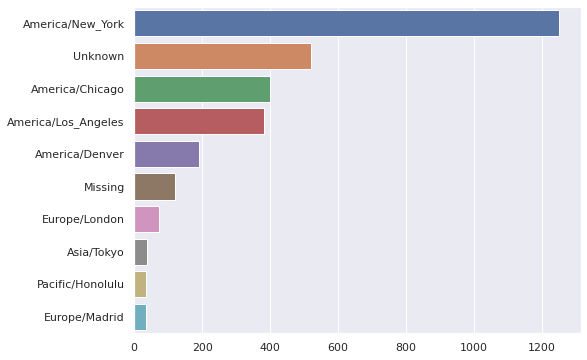

In [34]:
plt.subplots(figsize=(8,6))
sns.barplot(y=subset.index, x=subset.values)
plt.show()

O campo *a* contém informações sobre o navegador, o dispositivo ou
a aplicação utilizados para efetuar a abreviatura do URL:

In [35]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [36]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

Fazer parse de todas as informações interessantes nessas strings
de “agente” pode parecer uma tarefa desanimadora. Uma possível
estratégia consiste em dividir o primeiro token da string
(correspondente, grosso modo, aos recursos do navegador) e gerar
outro resumo do comportamento dos usuários:

In [37]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [38]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [39]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

Suponha agora que quiséssemos decompor os principais fusos
horários em usuários de Windows e usuários que não utilizam
Windows. Como simplificação, vamos supor que um usuário use
Windows se a string '*Windows*' estiver na string de agente. Como
alguns dos agentes não estão presentes, eles serão excluídos dos
dados:

In [40]:
cframe = frame[frame.a.notnull()]

Queremos então calcular um valor que informe se cada linha é
Windows ou não:

In [41]:
import numpy as np

In [42]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not-Windows')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
cframe['os'][:5]

0        Windows
1    Not-Windows
2        Windows
3    Not-Windows
4        Windows
Name: os, dtype: object

Em seguida, podemos agrupar os dados de acordo com a coluna de
fusos horários e essa nova lista de sistemas operacionais:

In [44]:
by_tz_os = cframe.groupby(['tz', 'os'])

Os contadores de grupo, de modo análogo à função *value_counts*,
podem ser calculados com *size*. Esse resultado é então
redimensionado para uma tabela usando unstack :

In [45]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [46]:
agg_counts[:10]

os,Not-Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


Por fim, vamos selecionar os principais fusos horários em geral.
Para isso, construirei um array de índices indiretos a partir dos
contadores de linha em *agg_counts*:

In [47]:
indexer = agg_counts.sum(1).argsort()

In [48]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

Usarei *take* para selecionar as linhas nessa ordem e então fatiarei as
dez últimas linhas (os maiores valores):

In [49]:
count_subset = agg_counts.take(indexer[-10:])

In [50]:
count_subset

os,Not-Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


O pandas tem um método conveniente chamado *nlargest* que faz o
mesmo:

In [51]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

Então, conforme mostrado no bloco de código anterior, podemos
fazer uma plotagem de barras desses dados; criarei uma plotagem
de barras empilhadas (stacked) passando um argumento adicional
para a função *barplot* do seaborn:

In [52]:
count_subset = count_subset.stack()

In [53]:
count_subset

tz                   os         
America/Sao_Paulo    Not-Windows     13.0
                     Windows         20.0
Europe/Madrid        Not-Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not-Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not-Windows      2.0
                     Windows         35.0
Europe/London        Not-Windows     43.0
                     Windows         31.0
America/Denver       Not-Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not-Windows    130.0
                     Windows        252.0
America/Chicago      Not-Windows    115.0
                     Windows        285.0
                     Not-Windows    245.0
                     Windows        276.0
America/New_York     Not-Windows    339.0
                     Windows        912.0
dtype: float64

In [54]:
count_subset.name = 'total'

In [55]:
count_subset = count_subset.reset_index()

In [56]:
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not-Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not-Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not-Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not-Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not-Windows,43.0
9,Europe/London,Windows,31.0


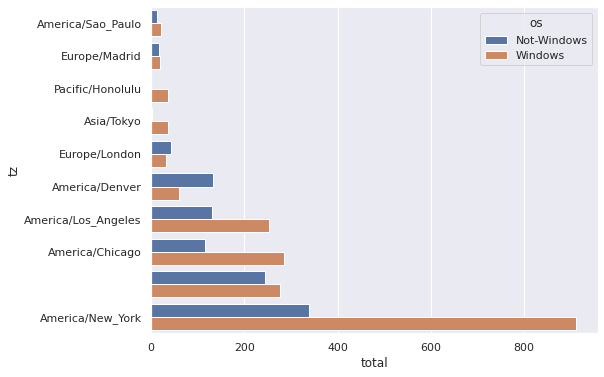

In [57]:
plt.subplots(figsize=(8,6))
sns.barplot(x='total', y='tz', hue='os', data=count_subset)
plt.show()

A plotagem não facilita ver o percentual relativo de usuários do
Windows nos grupos menores, portanto vamos normalizar os
percentuais dos grupos para que somem 1:

In [58]:
def normal_total(group):
  group['normed_total'] = group.total / group.total.sum()
  return group

In [59]:
results = count_subset.groupby('tz').apply(normal_total)

In [60]:
results.head(4)

,tz,os,total,normed_total
0,America/Sao_Paulo,Not-Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not-Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857


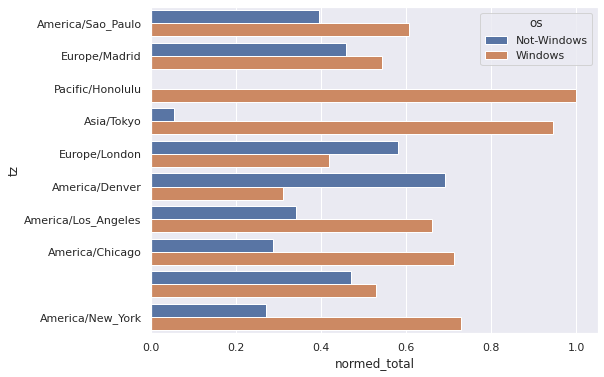

In [61]:
plt.subplots(figsize=(8,6))
sns.barplot(x='normed_total', y='tz', hue='os', data=results)
plt.show()

Poderíamos ter calculado a soma normalizada de modo mais eficaz
usando o método *transform* com groupby:

In [62]:
g = count_subset.groupby('tz')

In [63]:
results2 = count_subset.total / g.total.transform('sum')

In [64]:
results2.head(4)

0    0.393939
1    0.606061
2    0.457143
3    0.542857
Name: total, dtype: float64

### Conjunto de dados do MovieLens 1M

O GroupLens Research ( http://www.grouplens.org/node/73 ) disponibiliza
uma série de coleções de dados sobre avaliações de filmes,
coletadas de usuários do MovieLens no final dos anos 90 e início
dos anos 2000. Os dados contêm avaliações sobre os filmes,
metadados (gêneros e ano), além de dados demográficos sobre os
usuários (idade, CEP, identificação de gênero e profissão). Dados
como esses muitas vezes são de interesse no desenvolvimento de
sistemas de recomendação baseados em algoritmos de
aprendizado de máquina. Embora não exploraremos técnicas de
aprendizado de máquina em detalhes neste livro, mostrarei como
manipular conjuntos de dados como esses para que tenham o formato exato necessário a você.

O conjunto de dados MovieLens 1M contém um milhão de
avaliações coletadas de 6 mil usuários sobre 4 mil filmes. Os dados
estão espalhados em três tabelas: avaliações, informações de
usuários e informações sobre filmes. Depois de extrair os dados do
arquivo ZIP, podemos carregar cada tabela em um objeto Dataframe
do pandas usando *pandas.read_table*:


In [65]:
pd.options.display.max_rows = 10

In [66]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
path = '/content/drive/MyDrive/Análise de Dados/DataSets/movielens/users.dat'

In [67]:
users = pd.read_table(path, sep='::', header=None, names=unames)

/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [68]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
path = '/content/drive/MyDrive/Análise de Dados/DataSets/movielens/ratings.dat'

In [69]:
ratings = pd.read_table(path, sep='::', header=None, names=rnames)

/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [70]:
mnames = ['movie_id', 'title', 'geners']
path = '/content/drive/MyDrive/Análise de Dados/DataSets/movielens/movies.dat'

In [71]:
movies = pd.read_table(path, sep='::', header=None, names=mnames)

/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


É possível conferir se tudo ocorreu de forma bem-sucedida
observando as primeiras linhas de cada DataFrame com a sintaxe
de fatias de Python:

In [72]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [73]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [74]:
movies.head()

,movie_id,title,geners
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [75]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


Observe que as idades e as profissões estão codificadas como
inteiros referenciando grupos descritos no arquivo *README* do
conjunto de dados. Analisar os dados espalhados em três tabelas
não é uma tarefa simples; por exemplo, suponha que você quisesse
calcular as avaliações médias para um filme em particular, de
acordo com o sexo e a idade. Como veremos, isso será muito mais
simples de fazer se todos os dados estiverem combinados em uma
só tabela. Usando a função *merge* do pandas, inicialmente faremos o
merge de *ratings* e *users*, e então faremos o *merge* desse resultadocom os dados de *movies*. O pandas infere quais colunas deve usar
como as chaves do merge (ou da *junção*) com base nos nomes que
se sobrepõem:

In [76]:
data = pd.merge(pd.merge(ratings, users), movies)

In [77]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,geners
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [78]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
geners                                         Drama
Name: 0, dtype: object

Para obter as avaliações médias de cada filme agrupadas pela
identificação de gênero da pessoa, o método *pivot_table* pode ser
usado:

In [79]:
mean_ratings = data.pivot_table('rating', index='title', 
                                columns='gender', aggfunc='mean')

In [80]:
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


Com isso, geramos outro DataFrame contendo as avaliações
médias com os títulos dos filmes como rótulos das linhas (o “índice”)
e o gênero como rótulos das colunas. Inicialmente, filtrarei os filmes
que receberam pelo menos 250 avaliações (um número totalmente
arbitrário); para isso, agruparei os dados por título e usarei *size()*
para obter uma Series com os tamanhos dos grupos para cada
título:

In [81]:
ratings_by_title = data.groupby('title').size()

In [82]:
ratings_by_title.head(10)

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [83]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [84]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

O índice dos títulos que receberam no mínimo 250 avaliações pode
então ser usado para selecionar as linhas de *mean_ratings*:

In [85]:
mean_ratings = mean_ratings.loc[active_titles]

In [86]:
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [87]:
top_fem_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [88]:
top_fem_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Avaliando a discrepância nas avaliações

Suponha que você quisesse saber quais são os filmes que mais
dividem as opiniões entre os telespectadores masculinos e
femininos. Uma forma de fazer isso é adicionar uma coluna em
*mean_ratings* contendo a diferença nas médias e, então, ordenar de
acordo com esse dado:

In [89]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Ordenar por *'diff'* resulta nos filmes com as maiores diferenças de
avaliação, de modo que podemos ver quais são os preferidos pelas
mulheres:

In [90]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [91]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Se invertermos a ordem das linhas e fatiarmos novamente
separando as dez primeiras, teremos os filmes preferidos pelos
homens, e que não tiveram avaliações tão altas por parte das
mulheres:

In [92]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


Por outro lado, suponha que quiséssemos os filmes que tiveram
mais discrepância entre os telespectadores, independentemente da
identificação de gênero. É possível avaliar as discrepâncias pela
variância ou pelo desvio-padrão das avaliações:

In [93]:
ratings_std_by_title = data.groupby('title')['rating'].std()

In [94]:
ratings_std_by_title = ratings_std_by_title.loc[active_titles]

In [95]:
ratings_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### Nomes e bebês americanos de 1880 a 2010

O SSA (Social Security Administration, ou Administração de
Seguridade Social) dos Estados Unidos disponibilizou dados sobre a
frequência de nomes de bebês de 1880 até o presente.

Precisamos fazer um tratamento para carregar esse conjunto de
dados, mas, feito isso, teremos um DataFrame com a seguinte
aparência.

Há muitas tarefas que você pode querer fazer com o conjunto de
dados:

- visualizar a proporção de bebês, dado um nome em particular (o
seu próprio nome ou outro), no tempo;

- determinar a posição de classificação relativa de um nome;

- determinar os nomes mais populares a cada ano ou os nomes
cuja popularidade aumentou ou diminuiu mais;

- analisar tendências nos nomes: vogais, consoantes, tamanhos,
diversidade em geral, mudanças na grafia, primeira e última
letras;

- analisar origens externas para as tendências: nomes bíblicos,
celebridades, mudanças demográficas.

Com as ferramentas deste livro, muitos desses tipos de análise
estão à disposição, portanto descreverei alguns deles.
Atualmente (quando escrevi este livro), o SSA dos Estados Unidos
disponibiliza arquivos de dados, um por ano, contendo o número
total de nascimentos para cada combinação de sexo/nome. O
arquivo bruto com esses dados pode ser obtido em
http://www.ssa.gov/oact/babynames/limits.html.

Depois de fazer download do arquivo de “dados nacionais” names.zip e descompactá-
lo, você terá um diretório contendo uma série de arquivos como
yob1880.txt. Usarei o comando head do Unix para observar as dez
primeiras linhas de um dos arquivos (no Windows, você pode usar o
comando more ou abri-lo em um editor de texto):

In [96]:
!head -n 10 "/content/drive/MyDrive/Análise de Dados/DataSets/babynames/yob1880.txt"

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


Como já estão em um formato organizado, separados por vírgula,
esses dados poderão ser carregados em um DataFrame com
*pandas.read_csv*:

In [97]:
path = '/content/drive/MyDrive/Análise de Dados/DataSets/babynames/yob1880.txt'

In [98]:
names1880 = pd.read_csv(path, names=['name', 'sex', 'births'])

In [99]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


Esses arquivos contêm apenas os nomes com no mínimo cinco
ocorrências em cada ano, portanto, por questões de simplicidade,
podemos utilizar a soma da coluna de nascimentos por sexo como o
número total de nascimentos nesse ano:

In [100]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

Como o conjunto de dados está separado em arquivos por ano, uma
das primeiras tarefas é reunir todos os dados em um único
DataFrame e então adicionar um campo *year*. Isso pode ser feito
usando *pandas.concat*:

In [101]:
years = range(1880, 2011)

In [102]:
pieces = []
columns = ['name', 'sex', 'births']

In [103]:
for year in years:
  path = f'/content/drive/MyDrive/Análise de Dados/DataSets/babynames/yob{year}.txt'
  frame = pd.read_csv(path, names=columns)

  frame['year'] = year
  pieces.append(frame)

In [104]:
names = pd.concat(pieces, ignore_index=True)

Há alguns pontos a serem observados aqui. Em primeiro lugar,
lembre-se de que concat por padrão une objetos DataFrame por
linhas. Em segundo lugar, você deve passar *ignore_index=True* porque
não estamos interessados em preservar os números das linhas
originais devolvidos por *read_csv*. Desse modo, temos agora um
DataFrame bem grande contendo todos os dados sobre os nomes:

In [105]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


Com esses dados em mãos, já podemos começar a agregá-los em
níveis de ano e sexo usando *groupby* ou *pivot_table*:

In [106]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

In [107]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


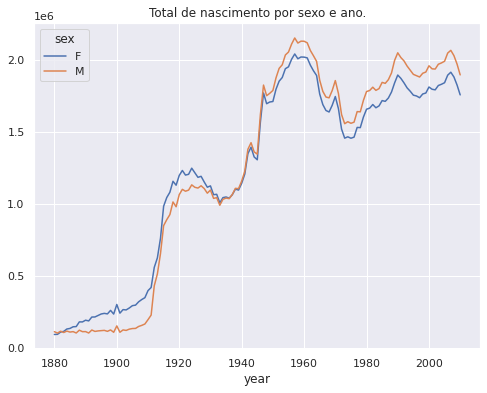

In [108]:
total_births.plot(title='Total de nascimento por sexo e ano.', figsize=(8,6))
plt.show()

A seguir, vamos inserir uma coluna *prop* com a fração dos bebês que
receberam cada nome, em relação ao número total de nascimentos.
Um valor de *prop* igual a *.02* indicaria que 2 de cada 100 bebês
receberam um nome em particular. Assim, agruparemos os dados
por ano e por sexo e então adicionaremos a nova coluna em cada
grupo:

In [109]:
def add_prop(group):
  group['prop'] = group.births / group.births.sum()
  return group

In [110]:
names = names.groupby(['year', 'sex']).apply(add_prop)

O conjunto de dados completo resultante agora tem as colunas a
seguir:

In [111]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


Ao executar uma operação de grupo como essa, muitas vezes é
importante fazer uma verificação de sanidade, por exemplo,
verificando se a coluna *prop* tem soma igual a 1 em todos os grupos:

In [112]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

Agora que fizemos isso, extrairei um subconjunto dos dados para
facilitar outra análise: os primeiros 1.000 nomes para cada
combinação de sexo/ano. Esta é outra operação de grupo:

In [113]:
def get_top1000(group):
  return group.sort_values(by='births', ascending=False)[:1000]

In [114]:
grouped = names.groupby(['year', 'sex'])

In [115]:
top1000 = grouped.apply(get_top1000)

In [116]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

Se preferir uma abordagem do tipo “faça você mesmo”, experimente
executar o seguinte:

In [117]:
pieces = []

for year, group in names.groupby(['year', 'sex']):
  pieces.append(group.sort_values(by='births', ascending=False)[:1000])

top1000 = pd.concat(pieces, ignore_index=True)

In [118]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


### Analisando tendências para os nomes

Com o conjunto de dados completo e aquele com os 1.000 primeiros
nomes em mãos, podemos começar a analisar diversas tendências
que nos interessem para os nomes. Separar os 1.000 primeiros
nomes em partes referentes a nomes de menino e nomes de
menina é fácil de fazer inicialmente:


In [119]:
boys = top1000[top1000.sex == 'M']

In [120]:
girls = top1000[top1000.sex == 'F']

Séries temporais simples, como o número de Johns ou de Marys em
cada ano, podem ser plotadas, porém exigem um pouco de
tratamento dos dados para que sejam mais úteis. Vamos compor
uma tabela pivô com o número total de nascimentos por ano e por
nome:

In [121]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name', aggfunc=sum)

Agora esses dados podem ser plotados para uma porção de nomes
com o método *plot* de DataFrame:

In [122]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [123]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

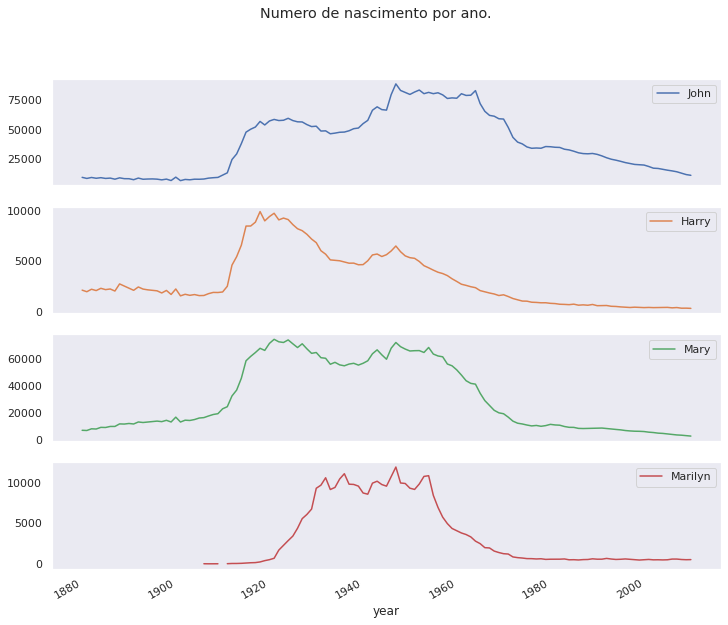

In [124]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title='Numero de nascimento por ano.')
plt.show()

### Avaliando o aumento na diversidade dos nomes

Uma explicação para o decréscimo nas plotagens é que menos pais
estão escolhendo nomes comuns para seus filhos. Essa hipótese
pode ser explorada e confirmada observando os dados. Uma
medida é a proporção de nascimentos representada pelos 1.000
nomes mais populares, para os quais fiz uma agregação e plotei por
ano e por sexo:


In [125]:
table = top1000.pivot_table('prop', index='year', 
                            columns='sex', aggfunc=sum)

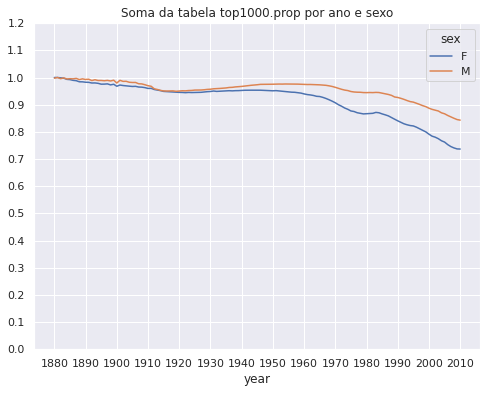

In [126]:
table.plot(title='Soma da tabela top1000.prop por ano e sexo',
           yticks=np.linspace(0, 1.2, 13),
           xticks=range(1880, 2020, 10),
           figsize=(8,6))
plt.show()

```
Proporção de nascimentos representada nos 1.000 primeiros nomes, por sexo.
```

Podemos ver que, realmente, parece haver um aumento na
diversidade dos nomes (redução da proporção total nos 1.000
primeiros). Outra métrica interessante é a quantidade de nomes
distintos, tomados em ordem de popularidade, do mais popular para
o menos, nos primeiros 50% dos nascimentos. Esse número é um
pouco mais complicado de calcular. Vamos considerar somente os
nomes de meninos em 2010:

In [127]:
df = boys[boys.year == 2010]

In [128]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


Depois de ordenar *prop* em ordem decrescente, queremos saber
quantos dos nomes mais populares são necessários para alcançar
50%. Você poderia implementar um laço *for* para isso, porém utilizar
uma solução vetorizada com o NumPy seria um pouco mais
inteligente. Obter a soma cumulativa *cumsum* de *prop* e então chamar
o método *searchsorted* devolve a posição na soma cumulativa em que
*0.5* deveria ser inserido para manter a ordenação:

In [129]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [130]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [131]:
prop_cumsum.values.searchsorted(0.5)

116

Como os arrays são indexados de zero, ao somar 1, o resultado é
igual a 117. Em comparação, em 1900, esse número era bem
menor:

In [132]:
df = boys[boys.year == 1900]

In [133]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [134]:
in1900.values.searchsorted(0.5) + 1

25

Podemos agora aplicar essa operação em cada combinação de
ano/sexo, usar *groupby* nesses campos e aplicar uma função com
*apply*, devolvendo o contador para cada grupo:

In [135]:
def get_quantile_count(group, q=0.5):
  group = group.sort_values(by='prop', ascending=False)
  return group.prop.cumsum().values.searchsorted(q) + 1

In [136]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [137]:
diversity = diversity.unstack('sex')

In [138]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


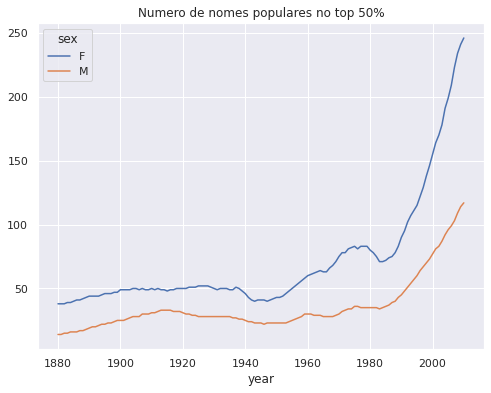

In [139]:
diversity.plot(title='Numero de nomes populares no top 50%', figsize=(8,6))
plt.show()

### A revolução da “última letra”

Em 2007, a pesquisadora de nomes de bebês Laura Wattenberg
destacou em seu site ( http://www.babynamewizard.com/ ) que a
distribuição de nomes de meninos de acordo com a última letrahavia mudado significativamente nos últimos 100 anos. Para conferir
isso, inicialmente fizemos a agregação de todos os nascimentos do
conjunto de dados completo por ano, sexo e a última letra:


In [140]:
get_last_letter = lambda x: x[-1]

In [141]:
last_letters = names.name.map(get_last_letter)

In [142]:
last_letters.name = 'last_letter'

In [143]:
table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [144]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [145]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

Em seguida, normalizamos a tabela pelo total de nascimentos a fim
de gerar uma nova tabela contendo a proporção do total de
nascimentos para cada sexo, cujo nome termine com cada letra:

In [146]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [147]:
letter_prop = subtable / subtable.sum()

In [148]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

Com as proporções das letras agora em mãos, podemos gerar
plotagens de barras para cada sexo, separadas por ano:

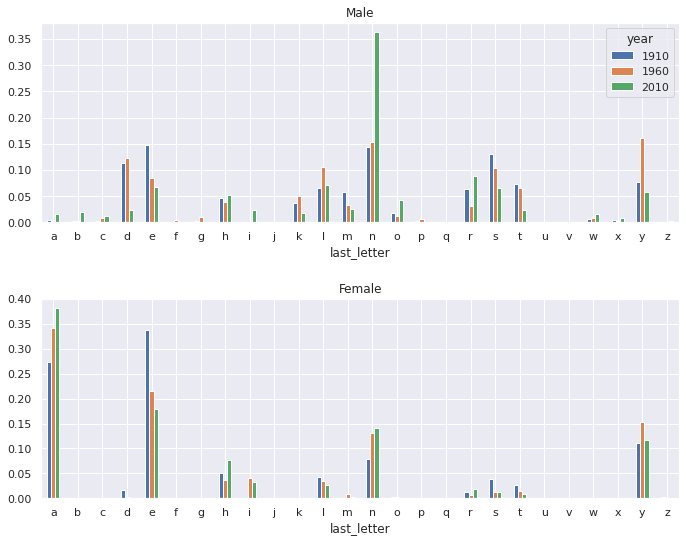

In [149]:
fig, ax = plt.subplots(2, 1, figsize=(10,8), )
letter_prop['M'].plot(kind='bar', rot=0, ax=ax[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=ax[1], title='Female', legend=False)
fig.tight_layout(pad=2)
plt.show()

```
Proporção de nomes de meninos e de meninas que terminam com cada letra.
```

Como podemos ver, os nomes de meninos que terminam com n
passaram por aumentos significativos desde os anos 1960. Voltando
à tabela completa criada antes, normalizarei novamente por ano e
por sexo e selecionarei um subconjunto de letras para nomes de
meninos; por fim, farei a transposição para que cada coluna seja
uma série temporal:

In [150]:
letter_prop = table / table.sum()

In [151]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [152]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


Com esse DataFrame de séries temporais em mãos, podemos gerar
uma plotagem das tendências no tempo, novamente usando o seu
método *plot*:

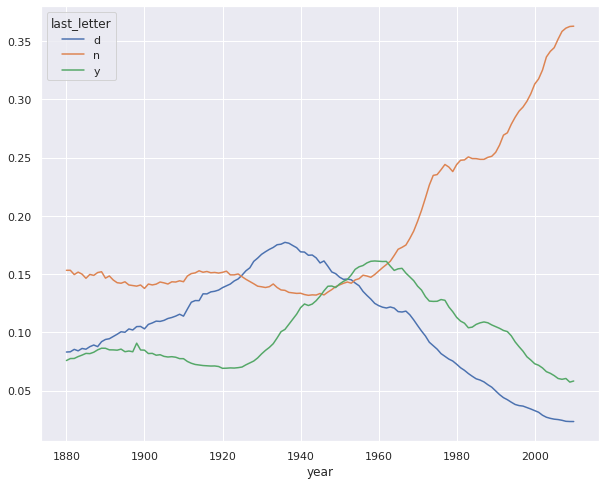

In [153]:
dny_ts.plot(figsize=(10,8))
plt.show()

```
Proporção de meninos nascidos cujos nomes terminam com d/n/y no tempo.
```

### Nomes de meninos que passaram a ser nomes de meninas (e vice-versa)

Outra tendência interessante é observar os nomes de meninos que
eram populares para um sexo antes na amostra, mas “mudaram de
sexo” atualmente. Um exemplo é o nome Lesley ou Leslie. Voltando
ao DataFrame *top1000*, extrairei uma lista de nomes presentes noconjunto de dados que comecem com “lesl”:

In [154]:
all_names = pd.Series(top1000.name.unique())

In [155]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [156]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

A partir desses dados, podemos filtrar para ter somente esses
nomes e somar os nascimentos agrupados por nome a fim de ver as
frequências relativas:

In [157]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [158]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [159]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')

In [160]:
table = table.div(table.sum(1), axis=0)

In [161]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


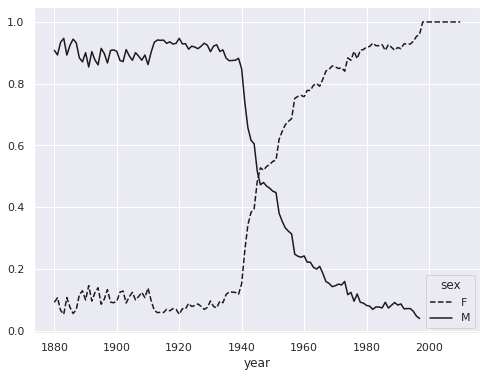

In [162]:
table.plot(style={'M': 'k-', 'F': 'k--'}, figsize=(8,6))
plt.show()

```
Proporção de nomes masculinos/femininos semelhantes a Lesley no tempo.
```

### Banco de dados de alimentos do USDA

O US Department of Agriculture (Departamento de Agricultura dos
Estados Unidos) disponibiliza um banco de dados com informações
sobre nutrientes nos alimentos. O programador Ashley Williams
disponibilizou uma versão desse banco de dados em formato JSON.

Cada alimento tem uma série de atributos de identificação, junto
com duas listas com nutrientes e tamanhos das porções. Os dados
nesse formato não favorecem particularmente uma análise, portanto
será necessário um pouco de trabalho para manipular os dados
deixando-os em um formato mais apropriado.

Depois de fazer download e de extrair os dados do link, você poderá
carregá-los em Python usando qualquer biblioteca JSON de sua
preferência. Utilizarei o módulo embutido *json* de Python:

In [163]:
import json

In [164]:
path = '/content/drive/MyDrive/Análise de Dados/DataSets/usda_food/database.json'

In [165]:
db = json.load(open(path))

In [166]:
len(db)

6636

In [167]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [168]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [169]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [170]:
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [171]:
keys = ['description', 'group', 'id', 'manufacturer']

In [172]:
info = pd.DataFrame(db, columns=keys)

In [173]:
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [174]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


Podemos ver a distribuição dos grupos de alimentos com
*value_counts*:

In [175]:
pd.value_counts(info['group'])[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [176]:
db[0]['id']

1008

In [177]:
nutrients = pd.DataFrame(db, columns=['id', 'nutrients'])

In [178]:
dfs = []

for i in range(len(db)):
  df = pd.DataFrame(db[i]['nutrients']).join(pd.DataFrame([db[i]['id']]*len(db[i]['nutrients'])).rename(columns={0: 'id'}), how='left')
  dfs.append(df)

nutrients = pd.concat(dfs, ignore_index=True)

In [179]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [180]:
nutrients.duplicated().sum()

14179

In [181]:
nutrients = nutrients.drop_duplicates()

Como *'group'* e *'description'* estão nos dois objetos DataFrame,
podemos renomeá-los por questões de clareza:

In [182]:
info = info.rename(columns={'description': 'food', 'group': 'fgroup'}, copy=False)

In [183]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [184]:
nutrients = nutrients.rename(columns={'description': 'nutrient', 
                                      'group': 'nutgroup'}, copy=False)

In [185]:
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [186]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [187]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [188]:
ndata.loc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [189]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

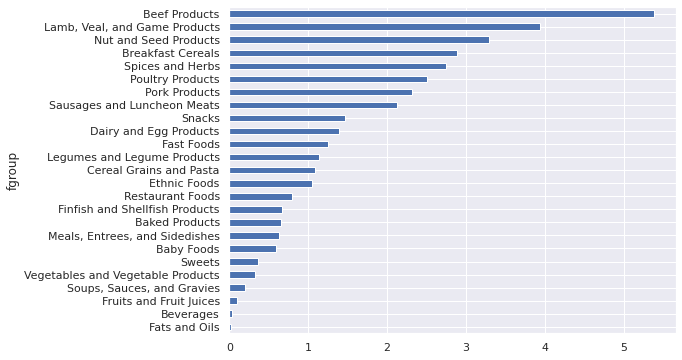

In [190]:
result['Zinc, Zn'].sort_values().plot(kind='barh', figsize=(8,6))
plt.show()

```
Valores da mediana de zinco por grupo de nutrientes.
```

In [191]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

In [192]:
get_max = lambda x: x.loc[x.value.idxmax()]
get_min = lambda x: x.loc[x.value.idxmin()]

In [193]:
max_foods = by_nutrient.apply(get_max)[['value', 'food']]

In [194]:
max_foods.food = max_foods.food.str[:50]

O DataFrame resultante é um pouco grande demais para ser exibido
no livro; eis apenas o grupo do nutriente *'Amino Acids'*:

In [195]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

### Banco de dados da Federal Election Commission em 2012

A Federal Election Commission (Comissão Eleitoral Federal) dos
Estados Unidos publica dados sobre contribuições para campanhas
políticas. Esses dados incluem os nomes dos colaboradores, a
profissão e o empregador, o endereço e o valor da contribuição. Um
conjunto de dados interessante é aquele da eleição presidencial
norte-americana de 2012. Uma versão do conjunto de dados que
baixei em junho de 2012 contém um arquivo CSV *P00000001-ALL.csv*
de 150 megabytes (veja o repositório de dados do livro), que pode
ser carregado com *pandas.read_csv*:

In [198]:
import chardet

In [200]:
path = '/content/drive/MyDrive/Análise de Dados/DataSets/fec/P00000001-ALL.csv'

In [205]:
with open(path, 'rb') as f:
  print(chardet.detect(f.read(1000)))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [197]:
fec = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [206]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [208]:
fec.iloc[12345]

cmte_id                C00431171
cand_id                P80003353
cand_nm             Romney, Mitt
contbr_nm       BERWANGER, ADELE
contbr_city        NEWPORT BEACH
                      ...       
receipt_desc                 NaN
memo_cd                      NaN
memo_text                    NaN
form_tp                    SA17A
file_num                  771927
Name: 12345, Length: 16, dtype: object

Você pode pensar em algumas maneiras de começar a manipular
esses dados a fim de extrair estatísticas informativas sobre
doadores e padrões nas contribuições de campanha. Mostrarei a
você uma série de análises diferentes que aplicam técnicas
apresentadas neste livro.

Podemos ver que não há filiações político-partidárias nos dados,
portanto seria conveniente acrescentar essa informação. Uma lista
com todos os candidatos políticos únicos pode ser obtida com
*unique*:

In [209]:
unique_cands = fec.cand_nm.unique()

In [210]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [211]:
unique_cands[2]

'Obama, Barack'

In [212]:
parties = {'Bachmann, Michelle': 'Republican',
'Cain, Herman': 'Republican',
'Gingrich, Newt': 'Republican',
'Huntsman, Jon': 'Republican',
'Johnson, Gary Earl': 'Republican',
'McCotter, Thaddeus G': 'Republican',
'Obama, Barack': 'Democrat',
'Paul, Ron': 'Republican',
'Pawlenty, Timothy': 'Republican',
'Perry, Rick': 'Republican',
"Roemer, Charles E. 'Buddy' III": 'Republican',
'Romney, Mitt': 'Republican',
'Santorum, Rick': 'Republican'}

Usando agora esse mapeamento e o método map de objetos Series,
podemos gerar um array de partidos políticos a partir dos nomesdos candidatos:

In [213]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [214]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [215]:
fec['party'] = fec.cand_nm.map(parties)

In [216]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

Eis alguns aspectos quanto à preparação dos dados. Inicialmente,
esses dados incluem tanto as contribuições quanto as restituições
(valores negativos de contribuição):

In [217]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [218]:
fec = fec[fec.contb_receipt_amt > 0]

Como Barack Obama e Mitt Romney eram os dois principais
candidatos, também prepararei um subconjunto com as
contribuições somente para as suas campanhas:

In [219]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### Estatísticas sobre as doações de acordo com a profissão e o empregador
As doações por profissão são outra estatística estudada com
frequência. Por exemplo, advogados tendem a doar mais dinheiro
aos democratas, enquanto executivos de negócios tendem a doar
mais aos republicanos. Você não tem nenhum motivo para acreditar
em mim; você mesmo pode ver isso analisando os dados. Em
primeiro lugar, é fácil obter o número total de doações por profissão:

In [220]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

Observando as profissões, você perceberá que muitas se referem
ao mesmo tipo básico de trabalho, ou que há diversas variantes da
mesma profissão. O trecho de código a seguir mostra uma técnica
para limpar algumas delas fazendo um mapeamento de uma
profissão para outra; observe o “truque” de usar *dict.get*, permitindo
que as profissões sem mapeamento “passem direto”:

In [221]:
occ_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED','INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
'C.E.O.': 'CEO'
}

In [222]:
# Se não houver nenhum mapeamento disponivel, devolve x
func = lambda x: occ_mapping.get(x, x)

In [ ]:
fec.contbr_occupation = fec.contbr_occupation.map(func)

In [224]:
emp_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'SELF' : 'SELF-EMPLOYED',
'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

In [225]:
func = lambda x: emp_mapping.get(x, x)

In [ ]:
fec.contbr_employer = fec.contbr_employer.map(func)

Agora podemos usar *pivot_table* para agregar os dados por partido e
por profissão e então filtrar a fim de obter o subconjunto daqueles
que doaram no mínimo 2 milhões de dólares de modo geral:

In [227]:
by_occup = fec.pivot_table('contb_receipt_amt', index='contbr_occupation',
                           columns='party', aggfunc='sum')

In [228]:
over_2mm = by_occup[by_occup.sum(axis=1) > 2000000]

In [229]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


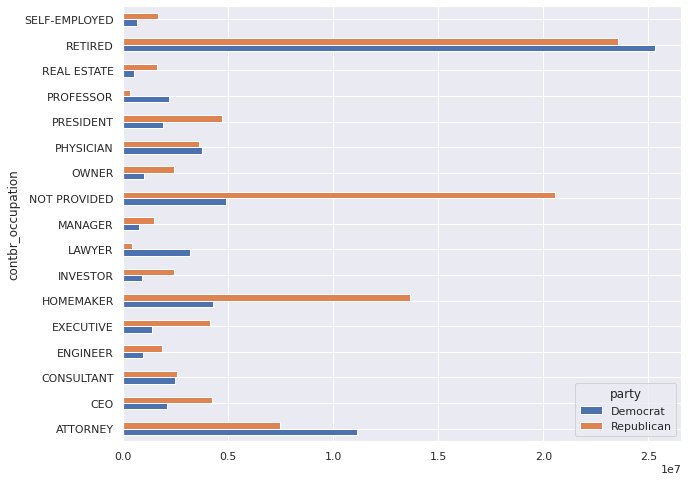

In [230]:
over_2mm.plot(kind='barh', figsize=(10,8))
plt.show()

```
Total de doações por partido para as principais profissões.
```

Você poderia estar interessado nas profissões dos principais
doadores ou nas principais empresas que fizeram doações para
Obama e para Romney. Para isso, poderá agrupar os dados por
nome de candidato e usar uma variante do método *top* que vimos
antes no capítulo:

In [231]:
def get_top_amounts(group, key, n=5):
  totals = group.groupby(key)['contb_receipt_amt'].sum()
  return totals.nlargest(n)

In [232]:
grouped = fec_mrbo.groupby('cand_nm')

In [233]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [235]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

### Separando os valores das doações em buckets

Um modo conveniente de analisar esses dados é usar a função cut a
fim de tornar discretos os valores das contribuições, separando-os
em buckets conforme o montante:

In [236]:
bins = np.array([0, 10, 100, 1000, 10000, 100000, 1000000, 10000000])

In [237]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [238]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (0, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (7, interval[int64]): [(0, 10] < (10, 100] < (100, 1000] < (1000, 10000] <
                                  (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

Podemos então agrupar os dados para Obama e Romney por nome
e rótulo do compartimento (bin) a fim de obter um histograma de
acordo com o montante da doação:

In [239]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [242]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 10]",40563,3758
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


Esses dados mostram que Obama recebeu um
número significativamente maior de doações menores do que Romney.
Também podemos somar os valores das contribuições e normalizar
nos buckets a fim de visualizar o percentual sobre o total de
doações de cada montante, por candidato:



In [244]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [245]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [246]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 10]",0.918645,0.081355
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


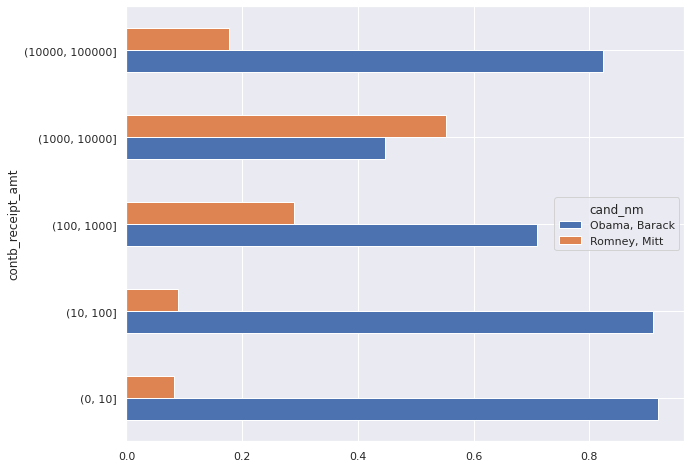

In [248]:
normed_sums[:-2].plot(kind='barh', figsize=(10,8))
plt.show()



```
Porcentagem do total de doações recebidas pelos candidatos para cada montante de doação.
```



### Estatísticas sobre as doações conforme o estado

Agregar os dados por candidato e por estado é uma tarefa rotineira:

In [249]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [250]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [251]:
totals = totals[totals.sum(axis=1) > 100000]

In [252]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


Se você dividir cada linha pelo valor total da contribuição, o
percentual relativo do total das doações por estado para cada
candidato será obtido:

In [253]:
percent = totals.div(totals.sum(axis=1), axis=0)

In [254]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
